In [1]:
from helpers.clean import *
from helpers.eda import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

teal = '#01ACA5'
purple = '#BF40BF'
dataiku = sns.color_palette([teal, purple], as_cmap=True)
sns.set_palette(dataiku)
white_median = dict(color='yellow')

pd.set_option('display.max_columns', 9)

import warnings
warnings.filterwarnings('ignore')

In [2]:
start = time.time()

In [3]:
header = ['age', 'class_of_worker', 'industry_code', 'occupation_code', 'education', 'wage_per_hour',
          'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code',
          'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union',
          'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses',
          'divdends_from_stocks', 'tax_filer_status', 'region_of_previous_residence',
          'state_of_previous_residence', 'detailed_household_and_family_stat',
          'detailed_household_summary_in_household', 'unknown_column', 'migration_code_change_in_msa',
          'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
          'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18',
          'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self',
          'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin',
          'veterans_benefits', 'weeks_worked_in_year', 'year', 'taxable_income_amount']

otrain = pd.read_csv('./data/census_income_learn.csv', names=header, sep=', ')
otest = pd.read_csv('./data/census_income_test.csv', names=header, sep=', ')

train = pd.read_csv('./data/census_income_learn.csv', names=header, sep=', ')
test = pd.read_csv('./data/census_income_test.csv', names=header, sep=', ')

In [4]:
train, test = clean_df(train), clean_df(test)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119738 entries, 0 to 119737
Data columns (total 22 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   age                                      119738 non-null  int64 
 1   industry_code                            119738 non-null  int64 
 2   occupation_code                          119738 non-null  int64 
 3   education                                119738 non-null  object
 4   marital_status                           119738 non-null  object
 5   race                                     119738 non-null  object
 6   hispanic_origin                          119152 non-null  object
 7   sex                                      119738 non-null  object
 8   full_or_part_time_employment_stat        119738 non-null  object
 9   tax_filer_status                         119738 non-null  object
 10  detailed_household_and_family_stat       119

In [6]:
eda_to_drop = []

### Quantitative variables

In [7]:
train_greater_50 = train[train.taxable_income_amount == 1]
train_lower_50 = train[train.taxable_income_amount == 0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


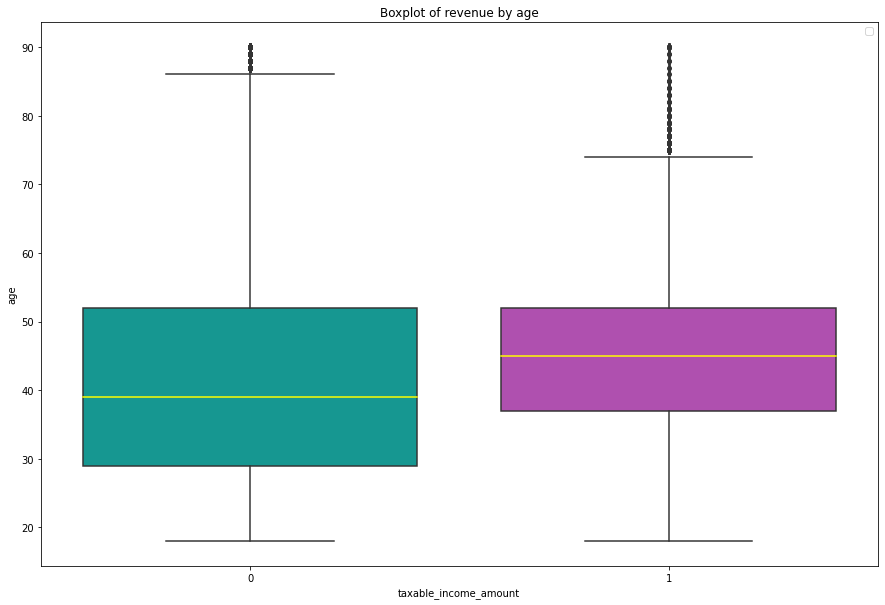

In [8]:
plt.figure(figsize=(15,10))

sns.boxplot(x=train.taxable_income_amount,
            y=train.age,
            medianprops=white_median)

plt.legend(loc='upper right')
plt.title("Boxplot of revenue by age")
plt.show()

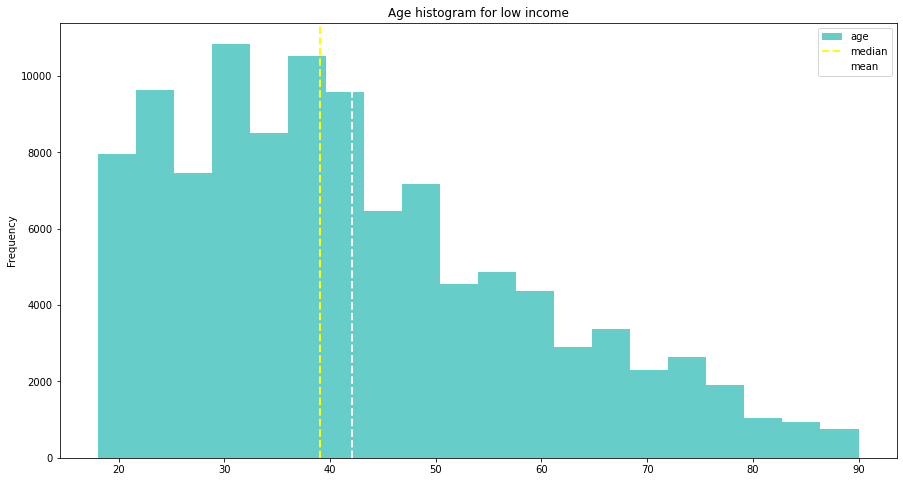

In [9]:
train_lower_50[['age']].plot.hist(bins=20, figsize=(15,8), alpha=0.6)

plt.axvline(train_lower_50['age'].median(),
            color='yellow',
            linestyle='--',
            linewidth=2,
            label='median')

plt.axvline(train_lower_50['age'].mean(),
            color='white',
            linestyle='--',
            linewidth=2,
            label='mean')

plt.legend(loc='upper right')
plt.title("Age histogram for low income")
plt.show()

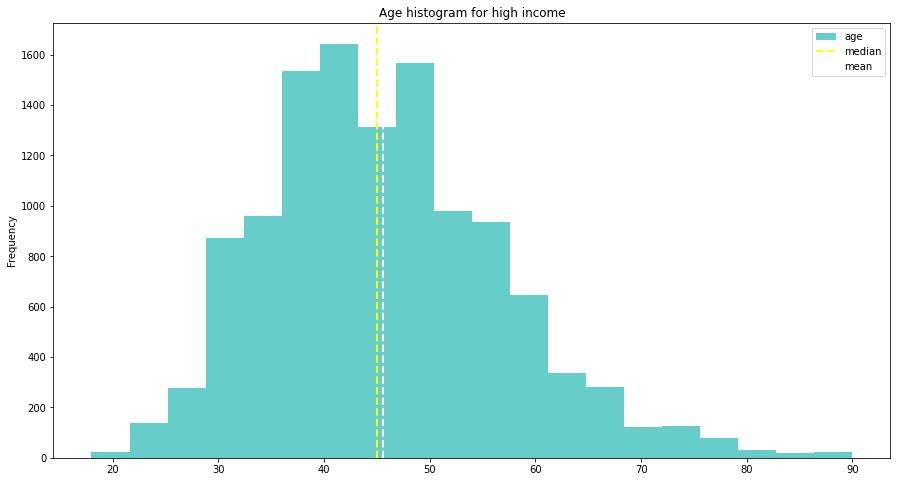

In [10]:
train_greater_50[['age']].plot.hist(bins=20, figsize=(15,8), alpha=0.6)

plt.axvline(train_greater_50['age'].median(),
            color='yellow',
            linestyle='--',
            linewidth=2,
            label='median')

plt.axvline(train_greater_50['age'].mean(),
            color='white',
            linestyle='--',
            linewidth=2,
            label='mean')

plt.legend(loc='upper right')
plt.title("Age histogram for high income")
plt.show()

In [11]:
high_mean = train_greater_50.age.mean()
high_median = train_greater_50.age.median()
low_mean = train_lower_50.age.mean()
low_median = train_lower_50.age.median()
print(f'For the high income category, the mean is {high_mean} and the median is {high_median}')
print(f'For the low income category, the mean is {low_mean} and the median is {low_median}')

For the high income category, the mean is 45.55504279241484 and the median is 45.0
For the low income category, the mean is 42.10978482656279 and the median is 39.0


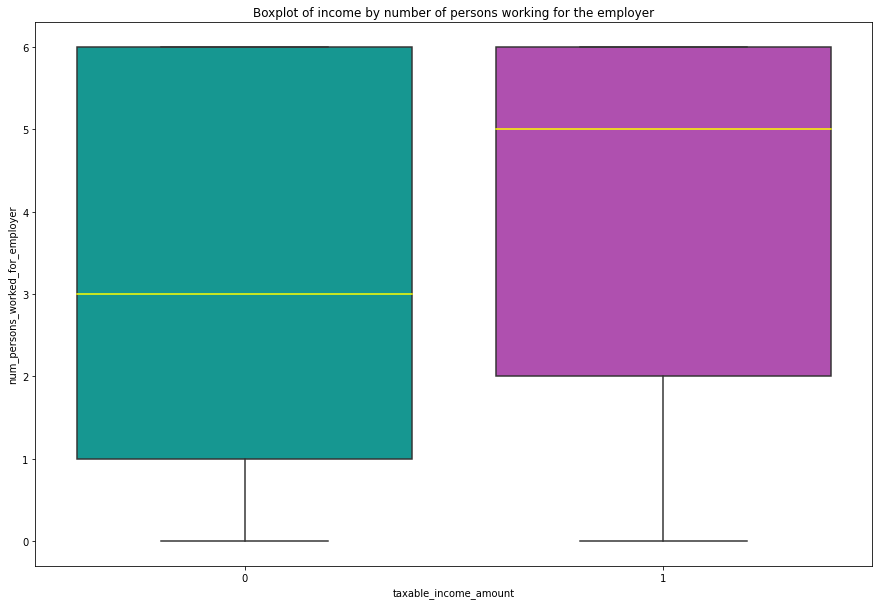

In [12]:
plt.figure(figsize=(15,10))
plt.title('Boxplot of income by number of persons working for the employer')
sns.boxplot(x=train.taxable_income_amount,
            y=train.num_persons_worked_for_employer,
            medianprops=white_median)
plt.show()

In [13]:
high_mean = train_greater_50.num_persons_worked_for_employer.mean()
high_median = train_greater_50.num_persons_worked_for_employer.median()
low_mean = train_lower_50.num_persons_worked_for_employer.mean()
low_median = train_lower_50.num_persons_worked_for_employer.median()
print(f'For the high income category, the mean is {high_mean} and the median is {high_median}')
print(f'For the low income category, the mean is {low_mean} and the median is {low_median}')

For the high income category, the mean is 4.100436314817922 and the median is 5.0
For the low income category, the mean is 2.94629938786867 and the median is 3.0


In [14]:
train.year.value_counts()

94    71720
95    48018
Name: year, dtype: int64

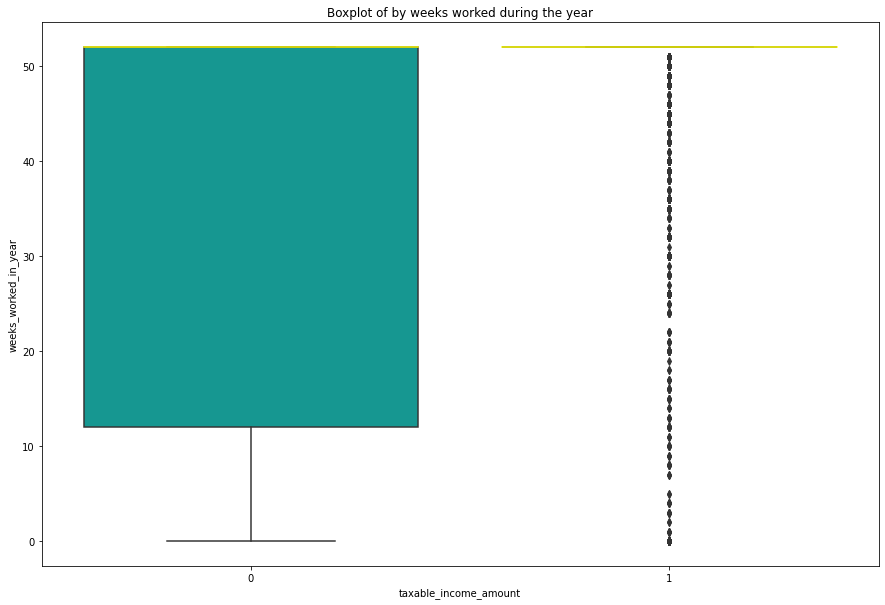

In [15]:
plt.figure(figsize=(15,10))
plt.title('Boxplot of by weeks worked during the year')
sns.boxplot(x=train.taxable_income_amount,
            y=train.weeks_worked_in_year,
            medianprops=white_median)
plt.show()

In [16]:
high_mean = train_greater_50.weeks_worked_in_year.mean()
high_median = train_greater_50.weeks_worked_in_year.median()
low_mean = train_lower_50.weeks_worked_in_year.mean()
low_median = train_lower_50.weeks_worked_in_year.median()
print(f'For the high income category, the mean is {high_mean} and the median is {high_median}')
print(f'For the low income category, the mean is {low_mean} and the median is {low_median}')

For the high income category, the mean is 49.44327907367008 and the median is 52.0
For the low income category, the mean is 35.98950102021888 and the median is 52.0


In [17]:
corr = train.corr()
corr.style.background_gradient(cmap='PRGn')

,age,industry_code,occupation_code,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,taxable_income_amount
age,1.000000,-0.287603,-0.302508,-0.294671,-0.191753,-0.097731,-0.306945,-0.164956,0.064193
industry_code,-0.287603,1.000000,0.256749,0.439461,0.140152,0.048467,0.564668,0.285374,0.105543
occupation_code,-0.302508,0.256749,1.000000,0.259925,0.116480,0.042715,0.423572,0.234722,-0.128774
num_persons_worked_for_employer,-0.294671,0.439461,0.259925,1.000000,0.122707,0.040425,0.582147,0.246710,0.148718
own_business_or_self_employed,-0.191753,0.140152,0.116480,0.122707,1.000000,0.012365,0.143079,0.079666,-0.002500
veterans_benefits,-0.097731,0.048467,0.042715,0.040425,0.012365,1.000000,0.060303,0.027137,-0.018726
weeks_worked_in_year,-0.306945,0.564668,0.423572,0.582147,0.143079,0.060303,1.000000,0.329520,0.190004
year,-0.164956,0.285374,0.234722,0.246710,0.079666,0.027137,0.329520,1.000000,0.074028
taxable_income_amount,0.064193,0.105543,-0.128774,0.148718,-0.002500,-0.018726,0.190004,0.074028,1.000000


`weeks_worked_in_year` is highly correlated with two variables: occupation and number of persons working for the employer. We drop `weeks_worked_in_year`.

In [18]:
eda_to_drop.append('weeks_worked_in_year')
print(eda_to_drop)

['weeks_worked_in_year']


## Qualitative variables

In [19]:
focus = 'industry_code'
df_focus = prepare_with_focus(df=train, focus=focus)

In [20]:
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]
Missing values in low_df: []
Missing values in high_df: [10]


In [21]:
high_bars = np.insert(high_bars, 10, 0)

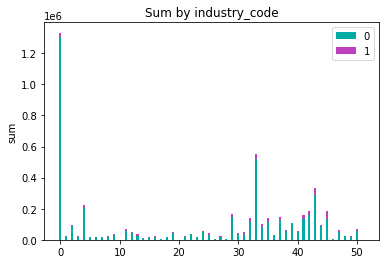

In [22]:
fig = plot_barplot(focus, labels, low_bars, high_bars)

No learning value, we drop.

In [23]:
eda_to_drop.append('industry_code')
print(eda_to_drop)

['weeks_worked_in_year', 'industry_code']


In [24]:
focus = 'education'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['10th grade' '11th grade' '12th grade no diploma'
 '1st 2nd 3rd or 4th grade' '5th or 6th grade' '7th and 8th grade'
 '9th grade' 'Associates degree-academic program'
 'Associates degree-occup /vocational' 'Bachelors degree(BA AB BS)'
 'Doctorate degree(PhD EdD)' 'High school graduate' 'Less than 1st grade'
 'Masters degree(MA MS MEng MEd MSW MBA)'
 'Prof school degree (MD DDS DVM LLB JD)' 'Some college but no degree']
Missing values in low_df: []
Missing values in high_df: ['Less than 1st grade']


In [25]:
high_bars = np.insert(high_bars, -3, 0)
high_bars

array([  2759,   3151,   1452,    435,   1022,   3898,   1848,  17969,
        18003, 166531,  30830,  82194,      0,  90811,  43536,  78486])

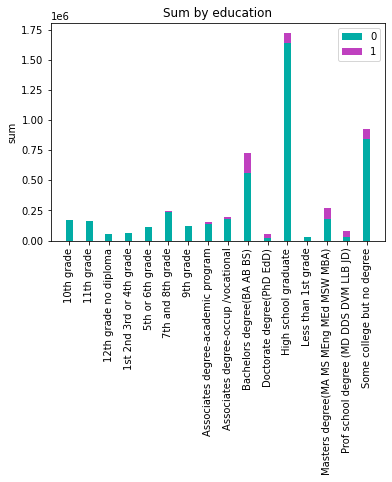

In [26]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

People who didn't complete high school mostly belong to the low income category.

Among people who did complete high school and potentially went to college, we start to see some high income.

People with high income make up about a quarter of the bachelors category and about a third of the master's degree category. They make up half of the PhD category.

Education seems to have an impact on the income since the more studies you pursue, the higher your chance to belong to the high income category.

In [27]:
focus = 'marital_status'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Divorced' 'Married-A F spouse present' 'Married-civilian spouse present'
 'Married-spouse absent' 'Never married' 'Separated' 'Widowed']
Missing values in low_df: []
Missing values in high_df: []


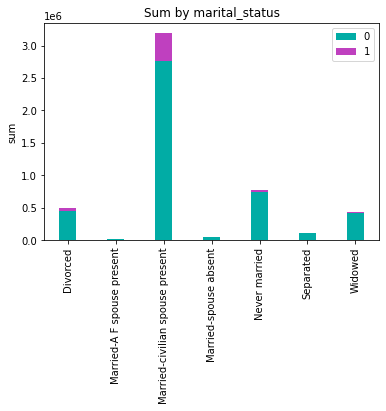

In [28]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

The majority of the high income population is married to a civilian.

In [29]:
focus = 'race'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Amer Indian Aleut or Eskimo' 'Asian or Pacific Islander' 'Black' 'Other'
 'White']
Missing values in low_df: []
Missing values in high_df: []


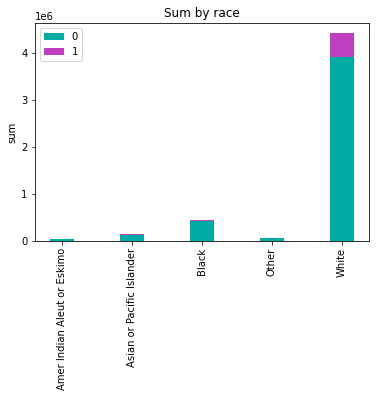

In [30]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

There's a bigger proportion of people earning more than $50K in the white population. Race might be a good predictor.

In [31]:
focus = 'hispanic_origin'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['All other' 'Central or South American' 'Chicano' 'Cuban' 'Do not know'
 'Mexican (Mexicano)' 'Mexican-American' 'Other Spanish' 'Puerto Rican']
Missing values in low_df: []
Missing values in high_df: []


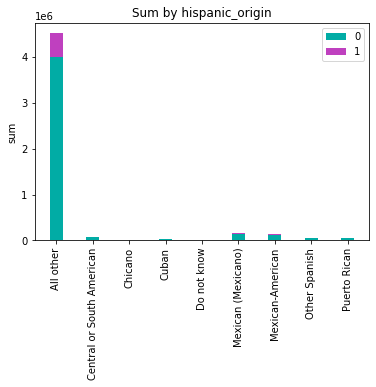

In [32]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

Majority of observations are in 'All other', we can remove this column. 

In [33]:
eda_to_drop.append('hispanic_origin')
print(eda_to_drop)

['weeks_worked_in_year', 'industry_code', 'hispanic_origin']


In [34]:
focus = 'sex'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Female' 'Male']
Missing values in low_df: []
Missing values in high_df: []


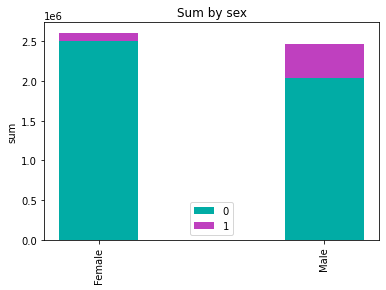

In [35]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

There's a bigger proportion of people earning more than $50K in the male population. Sex might be a good predictor.

In [36]:
focus = 'full_or_part_time_employment_stat'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Children or Armed Forces' 'Full-time schedules'
 'PT for econ reasons usually FT' 'PT for econ reasons usually PT'
 'PT for non-econ reasons usually FT' 'Unemployed full-time'
 'Unemployed part- time']
Missing values in low_df: []
Missing values in high_df: []


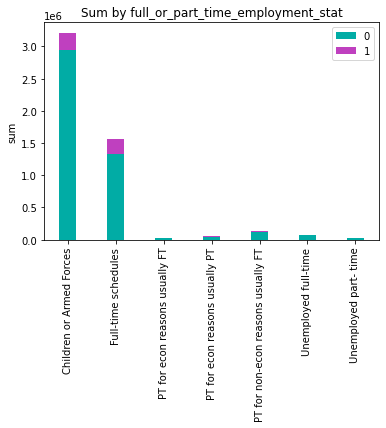

In [37]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

Armed forces and full time groups have a higher proportion of people earning more than $50K.

In [38]:
focus = 'tax_filer_status'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Head of household' 'Joint both 65+' 'Joint both under 65'
 'Joint one under 65 & one 65+' 'Nonfiler' 'Single']
Missing values in low_df: []
Missing values in high_df: []


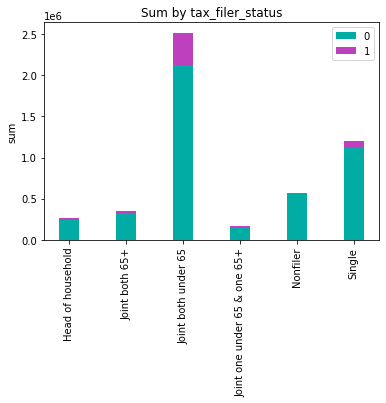

In [39]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

Joint both 65+ have a higher proportion of people earning more than $50K. Non filers have almost none.

In [40]:
focus = 'detailed_household_and_family_stat'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, low_df, high_df = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Child 18+ ever marr Not in a subfamily'
 'Child 18+ ever marr RP of subfamily'
 'Child 18+ never marr Not in a subfamily'
 'Child 18+ never marr RP of subfamily' 'Child 18+ spouse of subfamily RP'
 'Grandchild 18+ ever marr RP of subfamily'
 'Grandchild 18+ ever marr not in subfamily'
 'Grandchild 18+ never marr RP of subfamily'
 'Grandchild 18+ never marr not in subfamily'
 'Grandchild 18+ spouse of subfamily RP' 'Householder' 'In group quarters'
 'Nonfamily householder' 'Other Rel 18+ ever marr RP of subfamily'
 'Other Rel 18+ ever marr not in subfamily'
 'Other Rel 18+ never marr RP of subfamily'
 'Other Rel 18+ never marr not in subfamily'
 'Other Rel 18+ spouse of subfamily RP' 'RP of unrelated subfamily'
 'Secondary individual' 'Spouse of RP of unrelated subfamily'
 'Spouse of householder']
Missing values in low_df: []
Missing values in high_df: ['Grandchild 18+ ever marr RP of subfamily', 'Grandchild 18+ never marr RP of subfamily', 'Grandchild 18+ spouse of subfamily

In [41]:
high_bars = np.insert(high_bars, 5, 0)
high_bars = np.insert(high_bars, 7, 0)
high_bars = np.insert(high_bars, 9, 0)
high_bars = np.insert(high_bars, 15, 0)

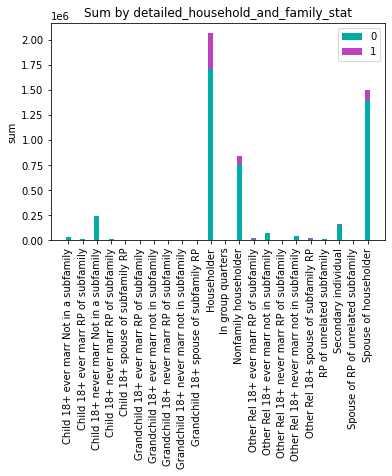

In [42]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

More than half of the individuals earning more than $50K are householders. They also make up a bigger part of the householder group than other groups.

In [43]:
focus = 'detailed_household_summary_in_household'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Child 18 or older' 'Group Quarters- Secondary individual' 'Householder'
 'Nonrelative of householder' 'Other relative of householder'
 'Spouse of householder']
Missing values in low_df: []
Missing values in high_df: []


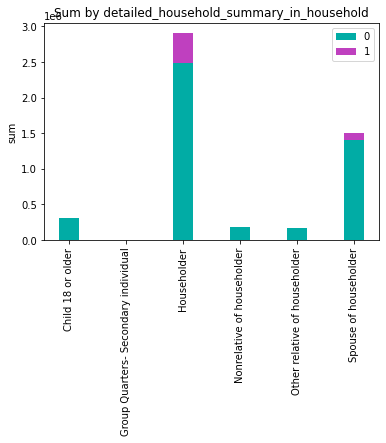

In [44]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

This category is a simplified version of the `detailed_household_and_family_stat` one. We could keep this one and throw away the other one, and revert changes if our model fails to have good results.

In [45]:
eda_to_drop.append('detailed_household_and_family_stat')
print(eda_to_drop)

['weeks_worked_in_year', 'industry_code', 'hispanic_origin', 'detailed_household_and_family_stat']


In [46]:
focus = 'country_of_birth_father'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, low_df, high_df = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong Kong' 'Hungary' 'India'
 'Iran' 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
 'Outlying-U S (Guam USVI etc)' 'Panama' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Puerto-Rico' 'Scotland' 'South Korea' 'Taiwan' 'Thailand'
 'Trinadad&Tobago' 'United-States' 'Vietnam' 'Yugoslavia']
Missing values in low_df: []
Missing values in high_df: ['Panama']


In [47]:
high_bars = np.insert(high_bars, 29, 0)

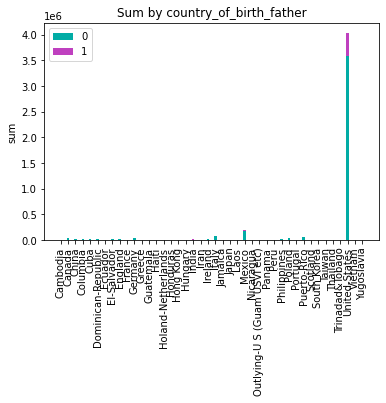

In [48]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

Most individuals earning more than $50K have a father born in the US.

In [49]:
focus = 'country_of_birth_mother'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, low_df, high_df = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong Kong' 'Hungary' 'India'
 'Iran' 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
 'Outlying-U S (Guam USVI etc)' 'Panama' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Puerto-Rico' 'Scotland' 'South Korea' 'Taiwan' 'Thailand'
 'Trinadad&Tobago' 'United-States' 'Vietnam' 'Yugoslavia']
Missing values in low_df: []
Missing values in high_df: ['Panama']


In [50]:
high_bars = np.insert(high_bars, 29, 0)

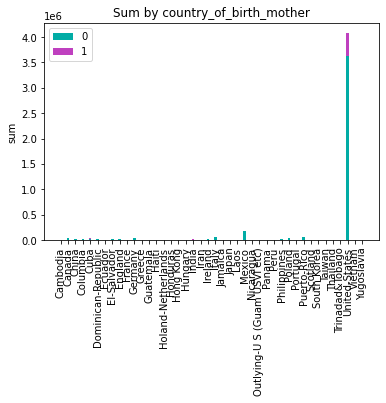

In [51]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

Most individuals earning more than $50K have a mother born in the US.

In [52]:
focus = 'country_of_birth_self'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, low_df, high_df = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong Kong' 'Hungary' 'India'
 'Iran' 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
 'Outlying-U S (Guam USVI etc)' 'Panama' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Puerto-Rico' 'Scotland' 'South Korea' 'Taiwan' 'Thailand'
 'Trinadad&Tobago' 'United-States' 'Vietnam' 'Yugoslavia']
Missing values in low_df: []
Missing values in high_df: ['Panama']


In [53]:
high_bars = np.insert(high_bars, 29, 0)

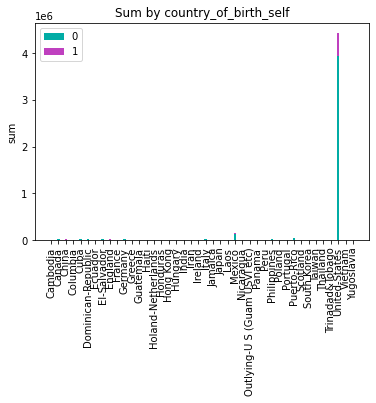

In [54]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

Most individuals earning more than $50K are born in the US.

We can remove these three columns as most observations are in the US anyway.

In [55]:
eda_to_drop.append('country_of_birth_father')
print(eda_to_drop)

['weeks_worked_in_year', 'industry_code', 'hispanic_origin', 'detailed_household_and_family_stat', 'country_of_birth_father']


In [56]:
eda_to_drop.append('country_of_birth_mother')
print(eda_to_drop)

['weeks_worked_in_year', 'industry_code', 'hispanic_origin', 'detailed_household_and_family_stat', 'country_of_birth_father', 'country_of_birth_mother']


In [57]:
eda_to_drop.append('country_of_birth_self')
print(eda_to_drop)

['weeks_worked_in_year', 'industry_code', 'hispanic_origin', 'detailed_household_and_family_stat', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self']


In [58]:
focus = 'citizenship'
df_focus = prepare_with_focus(df=train, focus=focus)
labels, low_bars, high_bars, _, _ = get_plotting_elements(df=df_focus, focus=focus)

Groups:  ['Foreign born- Not a citizen of U S '
 'Foreign born- U S citizen by naturalization'
 'Native- Born abroad of American Parent(s)'
 'Native- Born in Puerto Rico or U S Outlying'
 'Native- Born in the United States']
Missing values in low_df: []
Missing values in high_df: []


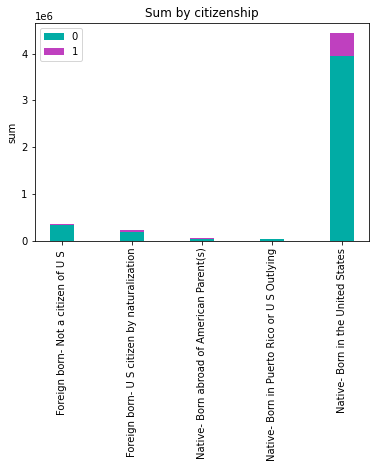

In [59]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

Most individuals earning more than $50K are US citizens.

In [60]:
focus = 'own_business_or_self_employed'
df_focus = prepare_with_focus(df=train, focus=focus, function='count')
labels, low_bars, high_bars, low_df, high_df = get_plotting_elements(df=df_focus, focus=focus)

Groups:  [0 1 2]
Missing values in low_df: []
Missing values in high_df: []


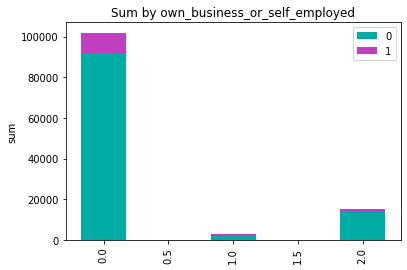

In [61]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

No big difference across groups, we can drop.

In [62]:
eda_to_drop.append('own_business_or_self_employed')
print(eda_to_drop)

['weeks_worked_in_year', 'industry_code', 'hispanic_origin', 'detailed_household_and_family_stat', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'own_business_or_self_employed']


In [63]:
focus = 'veterans_benefits'
df_focus = prepare_with_focus(df=train, focus=focus, function='count')
labels, low_bars, high_bars, low_df, high_df = get_plotting_elements(df=df_focus, focus=focus)

Groups:  [1 2]
Missing values in low_df: []
Missing values in high_df: []


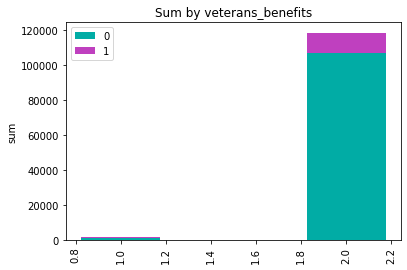

In [64]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

Most of the population doesn't get veterans benefits. We can drop.

In [65]:
eda_to_drop.append('veterans_benefits')
print(eda_to_drop)

['weeks_worked_in_year', 'industry_code', 'hispanic_origin', 'detailed_household_and_family_stat', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'own_business_or_self_employed', 'veterans_benefits']


In [66]:
focus = 'weeks_worked_in_year'
df_focus = prepare_with_focus(df=train, focus=focus, function='count')
labels, low_bars, high_bars, low_df, high_df = get_plotting_elements(df=df_focus, focus=focus)

Groups:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Missing values in low_df: []
Missing values in high_df: [6, 23]


In [67]:
high_bars = np.insert(high_bars, 6, 0)
high_bars = np.insert(high_bars, 23, 0)

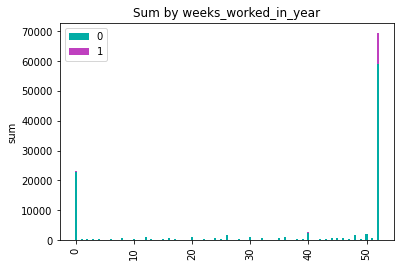

In [68]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

In [69]:
focus = 'year'
df_focus = prepare_with_focus(df=train, focus=focus, function='count')
labels, low_bars, high_bars, low_df, high_df = get_plotting_elements(df=df_focus, focus=focus)

Groups:  [94 95]
Missing values in low_df: []
Missing values in high_df: []


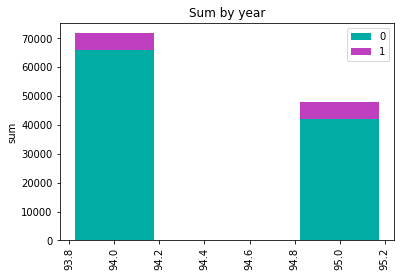

In [70]:
fig = plot_barplot(focus, labels, low_bars, high_bars, rotate=90)

No difference in year proportion, we could remove as well. 

In [71]:
eda_to_drop.append('year')
print(eda_to_drop)

['weeks_worked_in_year', 'industry_code', 'hispanic_origin', 'detailed_household_and_family_stat', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'own_business_or_self_employed', 'veterans_benefits', 'year']


In [72]:
train.drop(columns=eda_to_drop, inplace=True)

In [73]:
test.drop(columns=eda_to_drop, inplace=True)

In [74]:
train_observations_removed = otrain.shape[0] - train.shape[0] 
test_observations_removed = otest.shape[0] - test.shape[0]
train_columns_removed = otrain.shape[1] - train.shape[1]
test_columns_removed = otest.shape[1] - test.shape[1] 
train_observations_removed_ratio = train_observations_removed / otrain.shape[0] * 100
test_observations_removed_ratio = test_observations_removed / otest.shape[0] * 100
train_columns_removed_ratio = train_columns_removed / otrain.shape[1] * 100
test_columns_removed_ratio = test_columns_removed / otest.shape[1] * 100

print(f'{train_observations_removed} observations removed from the train set.')
print(f'{test_observations_removed} observations removed from the test set.')
print(f'{train_columns_removed} columns removed from the train set.')
print(f'{test_columns_removed} columns removed from the test set.')
print(f'Train dataset observations reduced by {round(train_observations_removed_ratio, 1)}%.')
print(f'Test dataset observations reduced by {round(test_observations_removed_ratio, 1)}%.')
print(f'Train dataset columns reduced by {round(train_columns_removed_ratio, 1)}%.')
print(f'Test dataset columns reduced by {round(test_columns_removed_ratio, 1)}%.')

79785 observations removed from the train set.
39607 observations removed from the test set.
30 columns removed from the train set.
30 columns removed from the test set.
Train dataset observations reduced by 40.0%.
Test dataset observations reduced by 39.7%.
Train dataset columns reduced by 71.4%.
Test dataset columns reduced by 71.4%.


In [75]:
otrain.shape[0] - train.shape[0] 

79785

In [76]:
otrain.taxable_income_amount.value_counts(normalize=True)

- 50000.    0.937942
50000+.     0.062058
Name: taxable_income_amount, dtype: float64

In [77]:
train.taxable_income_amount.value_counts(normalize=True)

0    0.900466
1    0.099534
Name: taxable_income_amount, dtype: float64

Imbalance reduced by 3%.

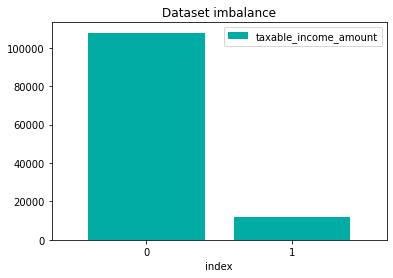

In [78]:
train.taxable_income_amount.value_counts() \
                           .reset_index()  \
                           .plot(kind='bar', x='index', y='taxable_income_amount',
                                 rot=0, color=teal, width=0.8, title='Dataset imbalance') \
                           .legend(loc='upper right')

plt.show()

In [79]:
end = time.time()
execution = round(end - start)
print(f'Visual EDA took {execution} seconds to execute.')

Visual EDA took 61 seconds to execute.
